<a href="https://colab.research.google.com/github/abhishekmani12/Signs-of-Ageing/blob/main/Face_detection_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PACKAGE IMPORT**

In [ ]:
import os
import cv2

In [ ]:
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**ACESSING FEATURES AND TARGETS**

In [ ]:
#Change access path of features and target as relevent to our project.
features=[]
target=[]
for x in range(0,3):
  ImagesNamesList=os.listdir("/content/drive/MyDrive/DATA" + "/" + str(x)) #Specify your location
  for y in ImagesNamesList:
    Imgarr=cv2.imread("//content/drive/MyDrive/DATA" + "/" + str(x) + "/" + y) #Specify your location
    #resize for different dimension set using .. inside try:
    try:
      Imgarr=cv2.resize(Imgarr,(100,100))    #Here 100,100 implies dimension
      features.append(Imgarr)
      target.append(x)
    except:       #this is used for exception
      pass
  print("In folder",x)


In folder 0
In folder 1
In folder 2


**CONVERTING TO ARRAY AND OTHER FUNCTIONS**

In [ ]:
features=np.array(features)

In [ ]:
target=np.array(target)

In [ ]:
features.shape

(1500, 100, 100, 3)

In [ ]:
target.shape

(1500,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
features_train,features_test,target_train,target_test=train_test_split(features, target,test_size=0.2)

In [ ]:
features_train.shape

(1200, 100, 100, 3)

In [ ]:
target_train.shape

(1200,)

**GRAYSCALING IMAGE FUNCTION**

In [ ]:
#run this without fail
def preprocessing(image):
  image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  image=image/255
  return image
  

In [ ]:
features_train=np.array(list(map(preprocessing,features_train)))

In [ ]:
features_train.shape

(1200, 100, 100)

In [ ]:
features_train=features_train.reshape(1200,100,100,1) #here use the number obtained from above,100,100,1

In [ ]:
features_test=np.array(list(map(preprocessing,features_test)))

In [ ]:
features_test.shape

(300, 100, 100)

In [ ]:
features_test=features_test.reshape(300,100,100,1) #here use the number obtained from above,100,100,1

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
dataGen=ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1)

In [ ]:
dataGen.fit(features_train)

In [ ]:
batches=dataGen.flow(features_train,target_train,batch_size=20)

In [ ]:
len(batches)

60

In [ ]:
images,labels=next(batches)

In [ ]:
images.shape

(20, 100, 100, 1)

**PLOTING AND DISPLAYING SOME DATASET IMAGES**

In [ ]:
import matplotlib.pyplot as plt

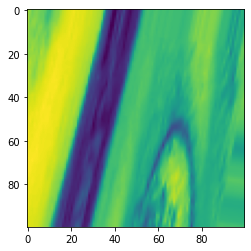

In [ ]:
#specify the dimension according to the specified dimension as mentioned above
#i.e 100,100 if we resize it to the same 
plt.imshow(images[0].reshape(100,100))
plt.show()

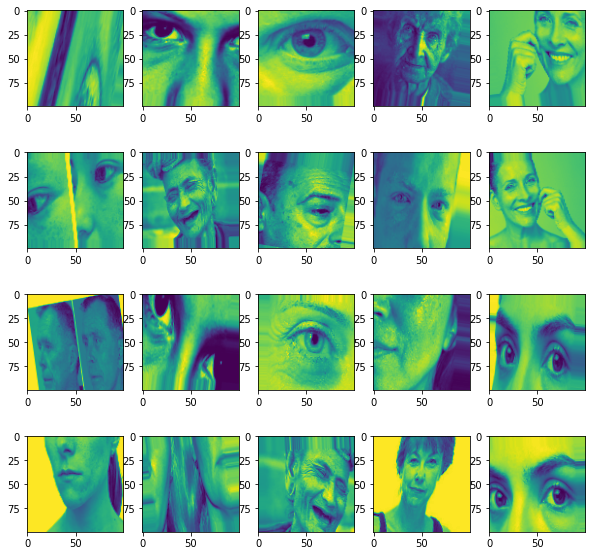

In [ ]:
plt.figure(figsize=(10,10))
for i in range(0,20):
    plt.subplot(4,5,i+1)
    #specify the dimension according to the specified dimension as mentioned above
    #i.e instead of 32,32 make it 100,100 if we resize it to the same 
    plt.imshow(images[i].reshape(100,100))
plt.show()
    

In [ ]:
#if u run in jupitor pls change it to "keras.utils import"
from keras.utils.np_utils import to_categorical

In [ ]:
target_train=to_categorical(target_train)

In [ ]:
target_train.shape

(1200, 3)

In [ ]:
features_train.shape

(1200, 100, 100, 1)

**ARCHITECTURE**

In [ ]:
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from keras.models import Sequential

In [ ]:
model=Sequential()
model.add(Conv2D(60,(3,3),activation="relu",input_shape=(100,100,1)))
model.add(Conv2D(60,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(30,(3,3),activation="relu"))
model.add(Conv2D(30,(3,3),activation="relu"))
model.add(Conv2D(30,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
#Dropout is used to block some neurons on overfitting
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(3,activation="softmax"))

#HERE CHANGE THE "3" ACCORDING TO THE COLUMN SPECIFIED BY TARGET_TRAIN.SHAPE CODE. here it is 3

**COMPILE**

In [ ]:
from keras.optimizers import Adam

In [ ]:
#here "learning_rate" is used as suggested by collab. You can use lr
model.compile(Adam(learning_rate=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

**TRAIN**

In [ ]:
model.fit_generator(dataGen.flow(features_train,target_train,batch_size=20),epochs=5)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
60/60 [==============================] - 93s 2s/step - loss: 0.3174 - accuracy: 0.8817
Epoch 2/5
60/60 [==============================] - 91s 2s/step - loss: 0.2937 - accuracy: 0.8817
Epoch 3/5
60/60 [==============================] - 91s 2s/step - loss: 0.3178 - accuracy: 0.8867
Epoch 4/5
60/60 [==============================] - 92s 2s/step - loss: 0.2766 - accuracy: 0.8925
Epoch 5/5
60/60 [==============================] - 91s 2s/step - loss: 0.2350 - accuracy: 0.9183


**SAMPLE PREDICTION**

In [ ]:
predictions = model.predict(features_test)

In [ ]:
predictions

array([[4.08477004e-04, 4.34873611e-01, 5.64717948e-01],
       [6.17167586e-03, 9.81357992e-01, 1.24703990e-02],
       [9.64987695e-01, 3.01394630e-02, 4.87287529e-03],
       [1.55042799e-03, 2.40278859e-02, 9.74421680e-01],
       [9.00386930e-01, 5.97708933e-02, 3.98421325e-02],
       [2.29780690e-05, 9.98713255e-01, 1.26376026e-03],
       [1.40149018e-03, 1.63094103e-01, 8.35504413e-01],
       [1.63186039e-03, 2.29422934e-04, 9.98138666e-01],
       [8.59964430e-01, 1.00415312e-01, 3.96202616e-02],
       [6.75011688e-05, 7.24488199e-02, 9.27483737e-01],
       [5.22588193e-02, 5.82279146e-01, 3.65462005e-01],
       [4.83193621e-03, 2.79781017e-02, 9.67189968e-01],
       [5.47733216e-04, 9.98660445e-01, 7.91769533e-04],
       [3.93451657e-03, 5.37201822e-01, 4.58863676e-01],
       [5.04388452e-01, 4.95180309e-01, 4.31283755e-04],
       [9.43150938e-01, 5.30395433e-02, 3.80957313e-03],
       [9.36694086e-01, 2.43928423e-03, 6.08666465e-02],
       [2.41999328e-03, 9.89685

Testing a prediction with test set

In [ ]:
predictions[0]

array([4.0847700e-04, 4.3487361e-01, 5.6471795e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

2

In [ ]:
target_test[0]  #This means predicted set n test set matches...........

2

**THIS IS OPTIONAL TO STORE/SAVE THE MODEL FOR FUTURE USE WITHOUT COMPLILING**

In [ ]:
#THIS IS OPTIONAL
from keras.models import model_from_json

In [ ]:
#optional
#converting model to json file to save
model_json=model.to_json()
with open("/content/drive/MyDrive/BLEH/age.json", "w") as abc:  #Specify your location
  abc.write(model_json)
  abc.close
#We save the weights of the model too in h5 format
model.save_weights("/content/drive/MyDrive/BLEH/ageweights.h5") #Specify your location
print("Save the model")

**LOAD FROM SAVED MODEL**

In [ ]:
#run this file to directly run it without compiling
json_file=open("/content/drive/MyDrive/BLEH/age.json","r") #Specify your location
loaded_model_json=json_file.read()
json_file.close
loaded_model=model_from_json(loaded_model_json)
loaded_model.load_weights("/content/drive/MyDrive/BLEH/ageweights.h5") #Specify your location
print("loaded the model successfully")

loaded the model successfully


In [ ]:
#testing if the load is successful
predictions=loaded_model.predict(features_train)

In [ ]:
len(predictions)

1200

**LABELING THE TARGET LIST**

In [ ]:
#run this without fail
import numpy as np
import cv2


def getClassName(classNo):
  if classNo == 0: return 'Darkspots Face'
  elif classNo == 1: return 'Puffy eyes Face'
  elif classNo == 2: return 'Wrinkles Face'

PREDICTION USING CAPTURING VIDEO FROM WEBCAM **NOT REQUIRED**

In [ ]:
capt=cv2.VideoCapture(0)
capt.set(3,640)
capt.set(4,480)
capt.set(10,180)

In [ ]:
while True:
  message,image=capt.read()                   #collect a image from webcam
  imagearr=np.asarray(image)                  #image is converted to array
  imagearr=cv2.resize(imagearr,(100,100))       #resize the array change dimension accordingly
  imagearr=preprocessing(imagearr)            #applying preprocessing technique
  imagearr=imagearr.reshape(1,100,100,1)        #converting 2D image to 4D image cause training data was 4D
  predictions=loaded_model.predict(imagearr)  #collection of probablities
  classIndex=loaded_model.predict_classes(imagearr)   #gives the index having highest Probablity value
  cv2.putText(image,"Class: ",(20,35),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2) 
  cv2.putText(image,"Probability: ",(20,75),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
  probabilityValue=np.amax(predictions)
  if probabilityValue>0.75:
    cv2.putText(image,getClassName(classIndex),(120 , 35),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
    cv2.putText(image, str(probabilityValue * 100) + " %", (160,75), cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
  cv2.imshow("Model Prediction", image)
  



**PEDICTION USING INPUT IMAGE**

In [ ]:
from google.colab.patches import cv2_imshow #for collab

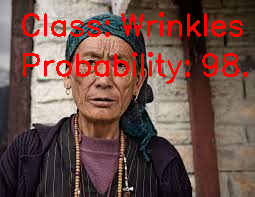

In [ ]:
  image=cv2.imread('/content/drive/MyDrive/BLEH/Wrinkles_Sample1.jpg', -1)
  imagearr=np.asarray(image)                  #image is converted to array
  imagearr=cv2.resize(imagearr,(100,100))       #resize the array change dimension accordingly
  imagearr=preprocessing(imagearr)            #applying preprocessing technique
  imagearr=imagearr.reshape(1,100,100,1)        #converting 2D image to 4D image cause training data was 4D
  predictions=loaded_model.predict(imagearr)  #collection of probablities
  classIndex=np.argmax(loaded_model.predict(imagearr), axis=-1) #this is for collab .. If any other IDE use the below code Below
  #classIndex=loaded_model.predict_classes(imagearr)   #gives the index having highest Probablity value
  cv2.putText(image,"Class: ",(20,35),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2) 
  cv2.putText(image,"Probability: ",(20,75),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
  probabilityValue=np.amax(predictions)
  if probabilityValue>0.75:
    cv2.putText(image,getClassName(classIndex),(120 , 35),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
    cv2.putText(image, str(probabilityValue * 100) + " %", (200,75), cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
  cv2_imshow(image) #USE cv2.imshow() in normal IDE